<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = pd.read_csv("/content/Sacramento_transactions.csv")
house_csv.head()




,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Text(0, 0.5, 'Square ft \n')

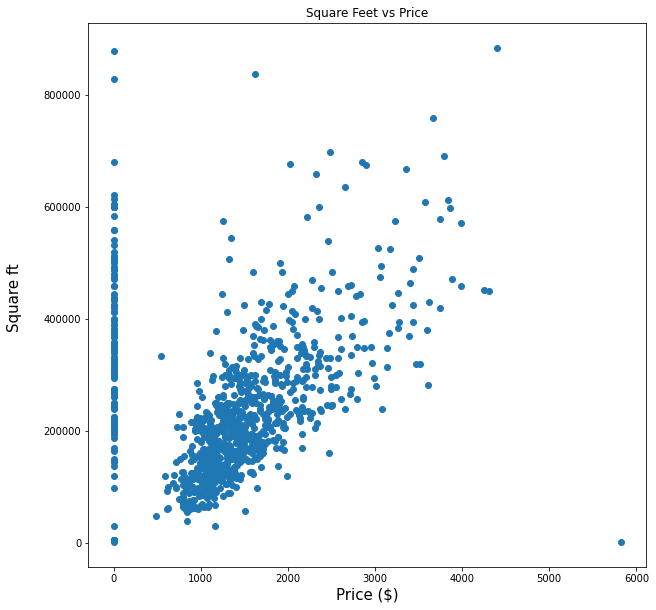

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(house_csv.sq__ft, house_csv.price)
plt.title("Square Feet vs Price")
plt.xlabel("Price ($)",fontsize=15)
plt.ylabel("Square ft \n",fontsize=15)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
index_list = house_csv[house_csv.sq__ft==0].index
index_list
df = house_csv.drop(index_list)
house_csv.loc[index_list]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [6]:
# ANSWER
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 2.2 List all possible variables which might be Predictor variable.

In [8]:
# ANSWER
beds, baths, sq_ft, type, zip, state, city

NameError: ignored

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [32]:
# ANSWER
#zip, beds, baths, sq_ft, price, latitude, longitude
house_csv.corr(), df.corr()

(                zip      beds     baths  ...     price  latitude  longitude
 zip        1.000000  0.125319  0.069165  ... -0.093353 -0.290389  -0.539904
 beds       0.125319  1.000000  0.839650  ...  0.342024 -0.291307  -0.053993
 baths      0.069165  0.839650  1.000000  ...  0.416208 -0.235792   0.016582
 sq__ft     0.130108  0.684041  0.665690  ...  0.333897 -0.383274  -0.177742
 price     -0.093353  0.342024  0.416208  ...  1.000000 -0.039573   0.284485
 latitude  -0.290389 -0.291307 -0.235792  ... -0.039573  1.000000   0.387925
 longitude -0.539904 -0.053993  0.016582  ...  0.284485  0.387925   1.000000
 
 [7 rows x 7 columns],
                 zip      beds     baths  ...     price  latitude  longitude
 zip        1.000000 -0.072673 -0.103332  ... -0.219591 -0.134134  -0.562983
 beds      -0.072673  1.000000  0.654746  ...  0.441988 -0.107440   0.056713
 baths     -0.103332  0.654746  1.000000  ...  0.501820 -0.081249   0.108081
 sq__ft    -0.101560  0.695710  0.724631  ...  0.69

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER
sq_ft

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [30]:
# ANSWER
np.abs(house_csv)

TypeError: ignored

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [34]:
# ANSWER
price_mean = df.price.mean()
sqft_mean = df.sq__ft.mean()

num1 = (df.price - price_mean) * (df.sq__ft - sqft_mean)
num2 = (df.sq__ft - sqft_mean) ** 2
num1_sum = num1.sum()
num2_sum = num2.sum()
beta1 = num1_sum / num2_sum
beta1


125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [36]:
# ANSWER
beta0 = price_mean - beta1 * sqft_mean
beta0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [37]:
# ANSWER
y = beta0 + beta1*df.sq__ft
y

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [41]:
# ANSWER
resid = df.price - y
resid


0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [42]:
# ANSWER
def get_b1(y_arr,x_arr):
    y_mean = y_arr.mean()
    x_mean = x_arr.mean()
    numer_arr = (y_arr - y_mean) * (x_arr - x_mean)
    denom_arr = (x_arr - x_mean)**2
    b1 = numer_arr.sum() / denom_arr.sum()
    return b1

def get_b0(y_arr,b1,x_mean):
    b0 = y_mean - b1 * x_mean
    return b0

def get_yhat_arr(b0,b1,x_arr):
    yhat_arr = b0 + b1 * x_arr
    return yhat_arr

def calculate_r_squared(y_arr,x_arr):
    b1 = get_b1(y_arr,x_arr)
    x_mean = x_arr.mean()
    y_mean = y_arr.mean()
    b0 = get_b0(y_arr,b1,x_mean)
    yhat_arr = get_yhat_arr(b0,b1,x_arr)
    SStot_arr = (y_arr - y_mean)**2
    SStot = SStot_arr.sum()
    SSres_arr = (y_arr - yhat_arr)**2
    SSres = SSres_arr.sum()
    r_squared = 1 - (SSres/SStot)
    return r_squared

def get_residual_arr(y_arr,x_arr):
    b1 = get_b1(y_arr,x_arr)
    x_mean = x_arr.mean()
    b0 = get_b0(y_arr,b1,x_mean)
    yhat_arr = get_yhat_arr(b0,b1,x_arr)
    residual_arr = y_arr - yhat_arr 
    return residual_arr

##### 2.7.F [BONUS] Draw Plot of Predicted Line

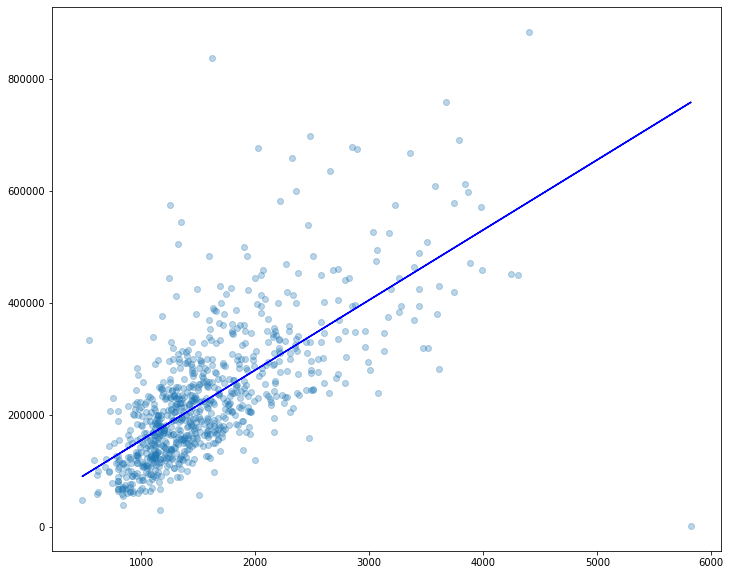

In [48]:
# ANSWER
plt.figure(figsize=(12,10))
plt.scatter(df.sq__ft, df.price, alpha=0.3)
plt.plot(df.sq__ft, y, color='blue')


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

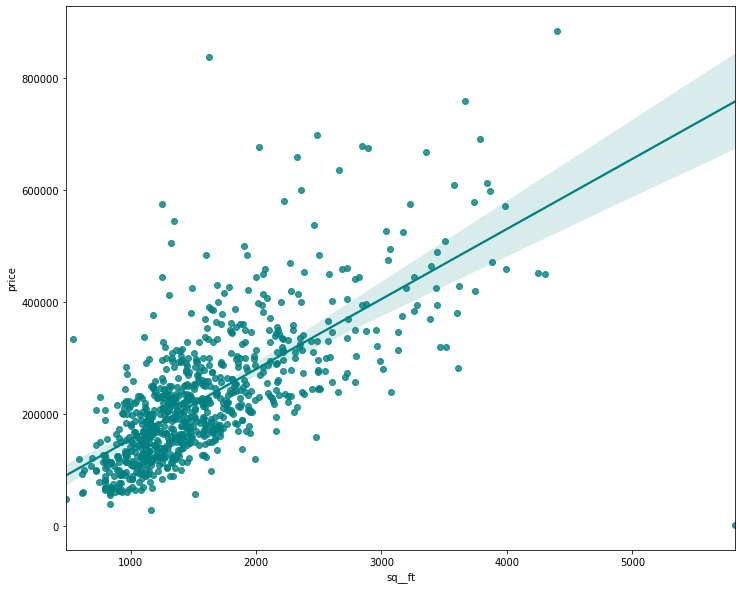

In [49]:
# ANSWER
plt.figure(figsize=(12,10))
sns.regplot(x="sq__ft",y="price",data=df,color='teal')


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [50]:
# ANSWER
predprice = beta0 + beta1 *1204
predprice

180971.28382945186



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



